<a id='topo'></a>

# Comparando arquiteturas

### [Modelo 1:](#modelo_1)
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

### [Modelo 2:](#modelo_2)
- Convolution2D filter 3x3 activation relu
- MaxPooling2D filter 3x3 
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

### [Modelo 3:](#modelo_3)
- Convolution2D filter 5x5 activation relu
- MaxPooling2D filter 4x4
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

In [1]:
# seed para Pyhton 
import random as rn
rn.seed(1254)

# seed para Tensorflow
import tensorflow as tf
tf.set_random_seed(89)

/home/camilalm/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


Samples shape: (2062, 64, 64)
Labels shape: (2062, 10)

Training shape: (1752, 64, 64)
1752 sample, 64 x 64 size grayscale image.



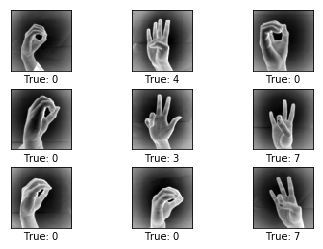

Test shape: (310, 64, 64)
310 sample, 64 x 64 size grayscale image.



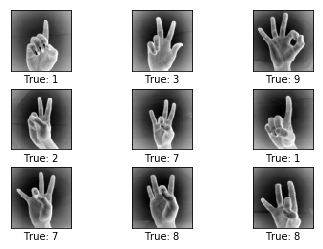

In [2]:
# Configura conjuntos de treinamento e teste 
# X_train, X_test, Y_train, Y_test
%run './functions/SLD-LoadTrainTestSets.ipynb'

In [3]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.models import Sequential, Model, Input
from keras.applications.mobilenet import MobileNet
from keras.layers import Conv2D, GlobalAveragePooling2D, Reshape, MaxPooling2D
from keras.optimizers import Adam

In [4]:
input_shape = (64,64)
adam_lr = 0.0001
nb_epochs = 100
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
validation_split = 0.1
batch_size=10
resultados = []

<a id='modelo_1'></a>

## Modelo 1 
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

[Voltar para topo](#topo)

In [5]:
model_1 = Sequential()
model_1.add(Flatten(input_shape=input_shape))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 525,706
Trainable params: 525,706
Non-trainable params: 0
_________________________________________________________________


Train on 1576 samples, validate on 176 samples
Epoch 1/100
1576/1576 [==============================] - 2s 1ms/step - loss: 2.3047 - acc: 0.1459 - val_loss: 2.1694 - val_acc: 0.2102
Epoch 2/100
1576/1576 [==============================] - 2s 1ms/step - loss: 2.1571 - acc: 0.2189 - val_loss: 2.1311 - val_acc: 0.2045
Epoch 3/100
1576/1576 [==============================] - 2s 1ms/step - loss: 2.0033 - acc: 0.3433 - val_loss: 1.9382 - val_acc: 0.3636
Epoch 4/100
1576/1576 [==============================] - 2s 1ms/step - loss: 1.8835 - acc: 0.3845 - val_loss: 1.9057 - val_acc: 0.3182
Epoch 5/100
1576/1576 [==============================] - 2s 1ms/step - loss: 1.8049 - acc: 0.4181 - val_loss: 1.7993 - val_acc: 0.3466
Epoch 6/100
1576/1576 [==============================] - 2s 1ms/step - loss: 1.7321 - acc: 0.4645 - val_loss: 1.7366 - val_acc: 0.3750
Epoch 7/100
1576/1576 [==============================] - 2s 994us/step - loss: 1.6417 - acc: 0.4994 - val_loss: 1.6478 - val_acc: 0.5000
Epoch 

Epoch 61/100
1576/1576 [==============================] - 2s 1ms/step - loss: 0.5809 - acc: 0.8255 - val_loss: 0.8356 - val_acc: 0.7557
Epoch 62/100
1576/1576 [==============================] - 1s 946us/step - loss: 0.5652 - acc: 0.8433 - val_loss: 0.8322 - val_acc: 0.7670
Epoch 63/100
1576/1576 [==============================] - 2s 975us/step - loss: 0.5626 - acc: 0.8344 - val_loss: 0.9647 - val_acc: 0.7045
Epoch 64/100
1576/1576 [==============================] - 2s 1ms/step - loss: 0.5680 - acc: 0.8363 - val_loss: 0.8323 - val_acc: 0.7614
Epoch 65/100
1576/1576 [==============================] - 2s 1ms/step - loss: 0.5602 - acc: 0.8395 - val_loss: 0.8512 - val_acc: 0.7500
Epoch 66/100
1576/1576 [==============================] - 2s 990us/step - loss: 0.5486 - acc: 0.8414 - val_loss: 0.8757 - val_acc: 0.7614
Epoch 67/100
1576/1576 [==============================] - 2s 976us/step - loss: 0.5486 - acc: 0.8464 - val_loss: 0.8356 - val_acc: 0.7557
Epoch 68/100
1576/1576 [================

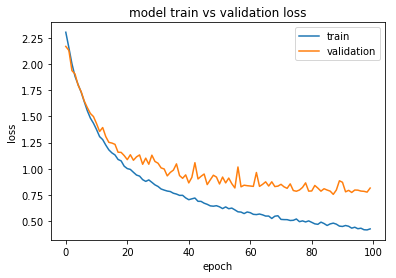

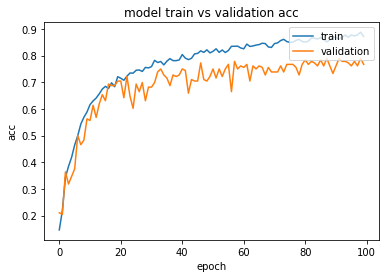

Acertos: 229 / 310
Confusion matrix, without normalization
[[27  2  0  0  2  0  0  0  1  0]
 [ 1 18  1  1  0  1  1  0  1  0]
 [ 0  0 30  0  0  0  1  3  0  0]
 [ 0  1  0 29  0  0  0  0  0  0]
 [ 1  0  1  0 12  2  6  6  1  1]
 [ 0  0  0  5  2 28  0  0  0  0]
 [ 0  0  2  0  1  0 21  4  0  0]
 [ 1  2  6  1  0  0  2 28  2  0]
 [ 0  3  3  0  3  0  1  4 12  2]
 [ 0  0  0  3  0  0  0  0  0 24]]
CPU times: user 7min 25s, sys: 58.7 s, total: 8min 24s
Wall time: 2min 50s


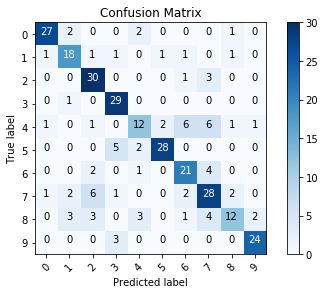

In [6]:
%%time
acertos, pred_1 = execute_model(model_1, X_train, Y_train, X_test, Y_test,
                                validation_split, batch_size, cm_plot_labels, 
                                adam_lr, nb_epochs)
resultados.append({'modelo': 'model_1', 'acertos': acertos})

<a id='modelo_2'></a>

## Modelo 2
- Convolution2D filter 3x3 activation relu
- MaxPooling2D filter 3x3 
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

[Voltar para topo](#topo)

In [7]:
y = x = Input(shape=(64,64,1))
y = Conv2D(3, kernel_size=(3, 3), activation='relu')(y)
y = MaxPooling2D(pool_size=(3, 3))(y)
y = Dropout(0.2)(y)
y = Flatten()(y)
y = Dense(128, activation='relu')(y)
y = Dense(10, activation='softmax')(y)
model_2 = Model(inputs=x, outputs=y)
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 3)         30        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 3)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               153728    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [8]:
expand_train_X = np.expand_dims(X_train, axis=-1)
expand_test_X = np.expand_dims(X_test, axis=-1)

Train on 1576 samples, validate on 176 samples
Epoch 1/100
1576/1576 [==============================] - 3s 2ms/step - loss: 2.2782 - acc: 0.1567 - val_loss: 2.2315 - val_acc: 0.2557
Epoch 2/100
1576/1576 [==============================] - 2s 1ms/step - loss: 2.1929 - acc: 0.3287 - val_loss: 2.1366 - val_acc: 0.4148
Epoch 3/100
1576/1576 [==============================] - 2s 1ms/step - loss: 2.0844 - acc: 0.4607 - val_loss: 2.0240 - val_acc: 0.4659
Epoch 4/100
1576/1576 [==============================] - 2s 1ms/step - loss: 1.9630 - acc: 0.5140 - val_loss: 1.8971 - val_acc: 0.5057
Epoch 5/100
1576/1576 [==============================] - 2s 1ms/step - loss: 1.8282 - acc: 0.5577 - val_loss: 1.7629 - val_acc: 0.5398
Epoch 6/100
1576/1576 [==============================] - 2s 1ms/step - loss: 1.6260 - acc: 0.5977 - val_loss: 1.4856 - val_acc: 0.6364
Epoch 7/100
1576/1576 [==============================] - 2s 1ms/step - loss: 1.3624 - acc: 0.6707 - val_loss: 1.3092 - val_acc: 0.6477
Epoch 8/

Epoch 61/100
1576/1576 [==============================] - 2s 1ms/step - loss: 0.2318 - acc: 0.9442 - val_loss: 0.4471 - val_acc: 0.8352
Epoch 62/100
1576/1576 [==============================] - 2s 989us/step - loss: 0.2311 - acc: 0.9499 - val_loss: 0.4649 - val_acc: 0.8295
Epoch 63/100
1576/1576 [==============================] - 2s 1ms/step - loss: 0.2302 - acc: 0.9435 - val_loss: 0.4468 - val_acc: 0.8352
Epoch 64/100
1576/1576 [==============================] - 2s 1ms/step - loss: 0.2247 - acc: 0.9429 - val_loss: 0.4423 - val_acc: 0.8352
Epoch 65/100
1576/1576 [==============================] - 2s 1ms/step - loss: 0.2152 - acc: 0.9511 - val_loss: 0.4382 - val_acc: 0.8466
Epoch 66/100
1576/1576 [==============================] - 2s 1ms/step - loss: 0.2170 - acc: 0.9537 - val_loss: 0.4511 - val_acc: 0.8295
Epoch 67/100
1576/1576 [==============================] - 2s 1ms/step - loss: 0.2128 - acc: 0.9480 - val_loss: 0.4498 - val_acc: 0.8352
Epoch 68/100
1576/1576 [======================

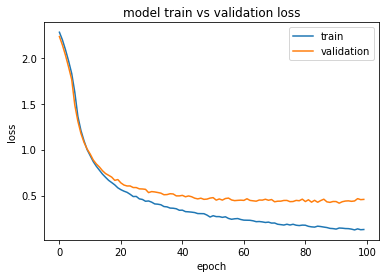

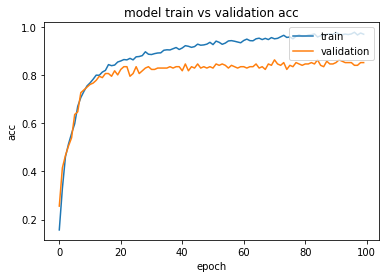

Acertos: 270 / 310
Confusion matrix, without normalization
[[31  1  0  0  0  0  0  0  0  0]
 [ 1 21  0  0  0  0  0  2  0  0]
 [ 0  0 31  0  0  0  0  3  0  0]
 [ 0  1  0 29  0  0  0  0  0  0]
 [ 1  0  0  0 20  0  4  3  1  1]
 [ 0  0  0  0  1 34  0  0  0  0]
 [ 0  0  2  0  3  0 21  2  0  0]
 [ 1  0  1  0  0  0  1 35  4  0]
 [ 0  0  0  0  0  0  0  4 22  2]
 [ 0  0  0  1  0  0  0  0  0 26]]
CPU times: user 7min 4s, sys: 45.9 s, total: 7min 50s
Wall time: 2min 50s


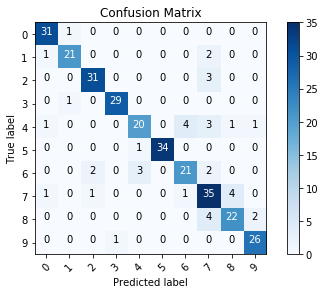

In [9]:
%%time
acertos, pred_2 = execute_model(model_2, expand_train_X, Y_train, expand_test_X, Y_test, 
                                validation_split, batch_size, cm_plot_labels, 
                                adam_lr, nb_epochs)
resultados.append({'modelo': 'model_2', 'acertos': acertos})

<a id='modelo_3'></a>

## Modelo 3 
- Convolution2D filter 5x5 activation relu
- MaxPooling2D filter 4x4
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

[Voltar para topo](#topo)

In [10]:
y = x = Input(shape=(64,64,1))
y = Conv2D(3, kernel_size=(5, 5), activation='relu')(y)
y = MaxPooling2D(pool_size=(4, 4))(y)
y = Dropout(0.2)(y)
y = Flatten()(y)
y = Dense(128, activation='relu')(y)
y = Dense(10, activation='softmax')(y)
model_3 = Model(inputs=x, outputs=y)
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 3)         78        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 3)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 3)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 675)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               86528     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total para

Train on 1576 samples, validate on 176 samples
Epoch 1/100
1576/1576 [==============================] - 3s 2ms/step - loss: 2.3129 - acc: 0.1168 - val_loss: 2.2359 - val_acc: 0.2386
Epoch 2/100
1576/1576 [==============================] - 3s 2ms/step - loss: 2.2048 - acc: 0.2405 - val_loss: 2.1455 - val_acc: 0.4148
Epoch 3/100
1576/1576 [==============================] - 3s 2ms/step - loss: 2.0910 - acc: 0.3655 - val_loss: 2.0157 - val_acc: 0.4886
Epoch 4/100
1576/1576 [==============================] - 3s 2ms/step - loss: 1.9661 - acc: 0.4549 - val_loss: 1.8815 - val_acc: 0.5227
Epoch 5/100
1576/1576 [==============================] - 2s 2ms/step - loss: 1.8279 - acc: 0.5305 - val_loss: 1.7378 - val_acc: 0.5682
Epoch 6/100
1576/1576 [==============================] - 2s 2ms/step - loss: 1.6872 - acc: 0.5730 - val_loss: 1.6210 - val_acc: 0.5966
Epoch 7/100
1576/1576 [==============================] - 3s 2ms/step - loss: 1.5732 - acc: 0.6034 - val_loss: 1.4895 - val_acc: 0.6648
Epoch 8/

Epoch 61/100
1576/1576 [==============================] - 2s 2ms/step - loss: 0.3745 - acc: 0.8864 - val_loss: 0.4823 - val_acc: 0.8636
Epoch 62/100
1576/1576 [==============================] - 3s 2ms/step - loss: 0.3669 - acc: 0.8966 - val_loss: 0.4877 - val_acc: 0.8409
Epoch 63/100
1576/1576 [==============================] - 2s 2ms/step - loss: 0.3622 - acc: 0.8928 - val_loss: 0.4816 - val_acc: 0.8580
Epoch 64/100
1576/1576 [==============================] - 2s 2ms/step - loss: 0.3548 - acc: 0.8991 - val_loss: 0.4865 - val_acc: 0.8239
Epoch 65/100
1576/1576 [==============================] - 2s 2ms/step - loss: 0.3574 - acc: 0.8940 - val_loss: 0.4895 - val_acc: 0.8523
Epoch 66/100
1576/1576 [==============================] - 2s 1ms/step - loss: 0.3452 - acc: 0.9029 - val_loss: 0.4758 - val_acc: 0.8636
Epoch 67/100
1576/1576 [==============================] - 2s 1ms/step - loss: 0.3504 - acc: 0.8978 - val_loss: 0.4807 - val_acc: 0.8352
Epoch 68/100
1576/1576 [========================

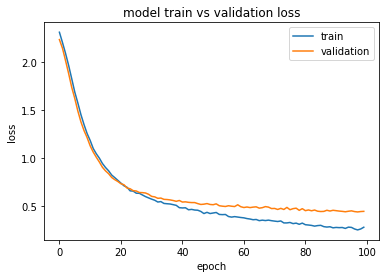

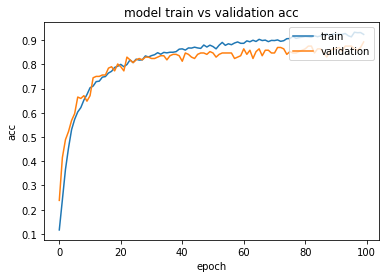

Acertos: 271 / 310
Confusion matrix, without normalization
[[31  1  0  0  0  0  0  0  0  0]
 [ 1 21  1  0  0  0  0  0  1  0]
 [ 0  0 33  0  0  0  0  1  0  0]
 [ 0  0  1 29  0  0  0  0  0  0]
 [ 1  0  0  0 24  0  2  1  1  1]
 [ 0  0  0  0  2 33  0  0  0  0]
 [ 0  0  2  0  3  0 21  2  0  0]
 [ 0  0  1  0  2  0  0 35  4  0]
 [ 0  0  0  0  1  0  0  5 20  2]
 [ 0  0  0  1  1  0  0  0  1 24]]
CPU times: user 11min 9s, sys: 50.9 s, total: 12min
Wall time: 4min 19s


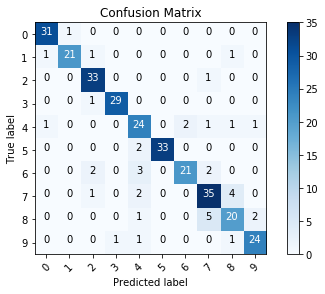

In [11]:
%%time
acertos, pred_3 = execute_model(model_3, expand_train_X, Y_train, expand_test_X, Y_test,
                                validation_split, batch_size, cm_plot_labels, 
                                adam_lr, nb_epochs)
resultados.append({'modelo': 'model_3', 'acertos': acertos})

[Voltar para topo](#topo)